In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\britt\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("./Resources/mergedfull_update.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.replace(np.nan, 0)
df.head()

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV,Playoffs
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.6,0.25,26,39,12,1
1,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.6,0.25,26,39,12,1
2,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.6,0.25,26,39,12,1
3,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.6,0.25,26,39,12,1
4,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.6,0.25,26,39,12,1


# Create a Train Test Split

Use `Playoffs` for the y values

In [5]:
y=df["Playoffs"]
X=df.drop(columns=["Playoffs"])
X

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
1,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
2,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
3,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
4,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746201,11,21801230,1610612757,30,32,36,38,0,0,0,0,136,0.582,0.727,0.583,19,44,12
746202,11,21801230,1610612757,30,32,36,38,0,0,0,0,136,0.582,0.727,0.583,19,44,12
746203,11,21801230,1610612757,30,32,36,38,0,0,0,0,136,0.582,0.727,0.583,19,44,12
746204,11,21801230,1610612757,30,32,36,38,0,0,0,0,136,0.582,0.727,0.583,19,44,12


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
X_train.shape, X_test.shape

((559654, 18), (186552, 18))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
importance = classifier.coef_[0]
importance

array([ 7.39052629e-01, -2.86900714e+00, -2.96255176e+00, -8.17914067e-01,
       -7.68632894e-01, -6.40282370e-01, -7.33179592e-01,  8.48067206e-02,
        1.58147337e-02,  3.60118967e-03,  8.97380012e-04, -8.09367195e-01,
       -1.58317022e-01, -3.26228379e-01,  1.89368322e-01, -9.36931124e-01,
       -4.26377447e-01, -2.98270019e-01])

In [12]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.73905
Feature: 1, Score: -2.86901
Feature: 2, Score: -2.96255
Feature: 3, Score: -0.81791
Feature: 4, Score: -0.76863
Feature: 5, Score: -0.64028
Feature: 6, Score: -0.73318
Feature: 7, Score: 0.08481
Feature: 8, Score: 0.01581
Feature: 9, Score: 0.00360
Feature: 10, Score: 0.00090
Feature: 11, Score: -0.80937
Feature: 12, Score: -0.15832
Feature: 13, Score: -0.32623
Feature: 14, Score: 0.18937
Feature: 15, Score: -0.93693
Feature: 16, Score: -0.42638
Feature: 17, Score: -0.29827


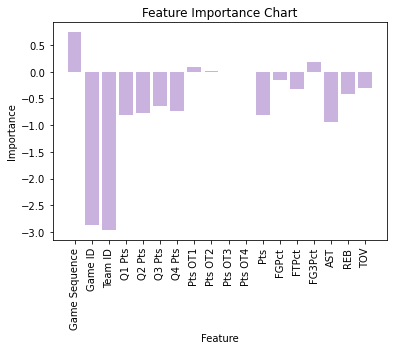

In [20]:
pyplot.bar([x for x in range(len(importance))], importance, color = 'tab:purple', alpha = 0.5, align = 'center')
tick_locations = [x for x in range(len(importance))]
pyplot.xticks(tick_locations, ["Game Sequence", "Game ID", "Team ID", "Q1 Pts", "Q2 Pts", "Q3 Pts", 
                            "Q4 Pts", "Pts OT1", "Pts OT2", "Pts OT3", "Pts OT4", "Pts", "FGPct", "FTPct","FG3Pct", "AST", "REB", "TOV"],
                              rotation = 'vertical')
pyplot.title("Feature Importance Chart")
pyplot.xlabel("Feature")
pyplot.ylabel("Importance")
pyplot.show()

In [14]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9999946395451476
Testing Data Score: 0.9999839186929114
